In [1]:
using DifferentialEquations, Plots, DataFrames, BenchmarkTools

## with quasi steady state assumption


In [2]:
function rtc_ode!(dydt, initial, params, t)

    k1, k2, k3, k4, katp, ctot, a0, b0 = params 

    b, c, d, p = initial 

    dbdt, dcdt, dddt, dpdt = zeros(length(dydt))
    
    e = (k3*d*ctot/(k4+katp+k3*d)) 
    a = (((6*a0)-b0+b)/6)

    dydt[1] = -6*k1*(b^6)*a + 6*k2*c 
    dydt[2] = k1*(b^6)*a - k2*c - k3*c*d + (k4+katp)*e
    dydt[3] = -k3*c*d + k4*e
    dydt[4] = katp*e
end

rtc_ode! (generic function with 1 method)

In [3]:
k1 = 0.1
k2 = 0.1
k3 = 0.1
k4 = 0.1
katp = 10
a0 = 10
b0 = 10
ctot = (a0 + b0)/7

params = [k1, k2, k3, k4, katp, ctot, a0, b0]

b_0 = 10
c_0 = 0
d_0 = 10
p_0 = 0 
init = [b_0, c_0, d_0, p_0]

tspan = (0.0, 20.0)



(0.0, 20.0)

In [176]:
prob = ODEProblem(rtc_ode!, init, tspan, params);
sol = solve(prob, alg=Rodas4());

In [177]:
species = ["b" "c" "d" "p"];
species2 = [:b, :c, :d, :p];
solDF = DataFrame([[j[i] for j in sol.u] for i=1:length(sol.u[1])], species2);
b = solDF[!, :b];
c = solDF[!, :c];
d = solDF[!, :d];
p = solDF[!, :p];


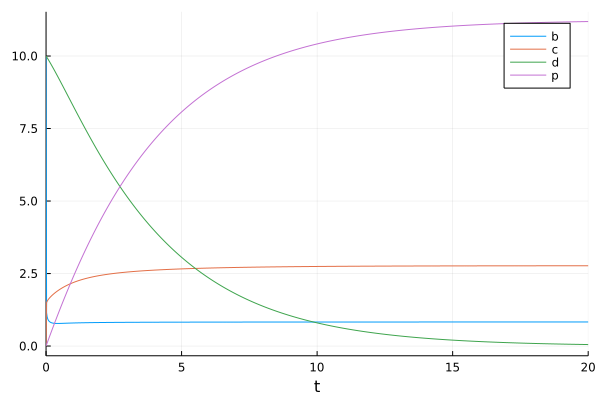

In [178]:
plot(sol, labels=species)

## without quasi steady state assumption

In [179]:
function rtc_ode2!(dydt, initial, params, t)

    k1, k2, k3, k4, katp, ctot, a0, b0 = params 

    b, c, d, e, p = initial 

    dbdt, dcdt, dddt, dedt, dpdt = zeros(length(dydt))
    
    a = (((6*a0)-b0+b)/6)

    dydt[1] = -6*k1*(b^6)*a + 6*k2*c 
    dydt[2] = k1*(b^6)*a - k2*c - k3*c*d + (k4+katp)*e
    dydt[3] = -k3*c*d + k4*e
    dydt[4] = k3*c*d - k4*e - katp*e
    dydt[5] = katp*e 
end

rtc_ode2! (generic function with 1 method)

In [180]:
e_0 = 0
init2 = [b_0, c_0, d_0, e_0, p_0]

5-element Vector{Int64}:
 10
  0
 10
  0
  0

In [181]:
prob2 = ODEProblem(rtc_ode2!, init2, tspan, params);
sol2 = solve(prob2, alg=Rodas4());

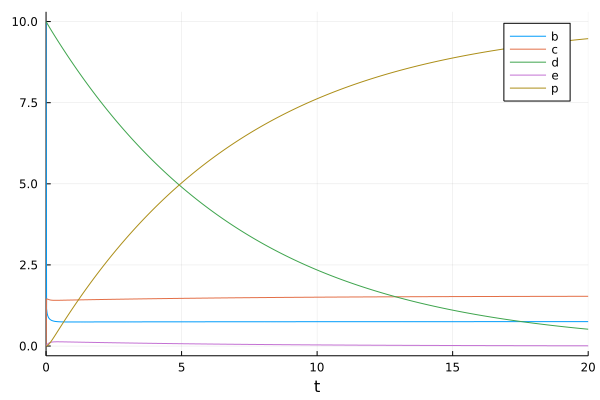

In [182]:
species3 = ["b" "c" "d" "e" "p"]
plot(sol2, labels=species3)

## using hill func as rate for production of c 

In [4]:
function rates_model!(dydt, initial, params, t) # doesn't work when e isn't mm 
    k1, k2, k3, k4, katp, ctot, a0, b0 = params 

    b, c, d, p = initial 

    dbdt, dcdt, dddt, dpdt = zeros(length(dydt))
    
    a = ((6*a0-b0+b)/6)
    vmax = k2*ctot
    kb = c/(a*(b^6))
    e = (k3*d*ctot/(k4+katp+k3*d)) 
    v = vmax*kb*(b^6)/(1+kb*(b^6)) # hill

    dydt[1] = -6*k1*(b^6)*a + 6*k2*c 
    dydt[2] = v - k3*c*d + k4*e + katp*e 
    dydt[3] = -k3*c*d + k4*e
    dydt[4] =  katp*e
    
end

rates_model! (generic function with 1 method)

In [5]:
prob3 = ODEProblem(rates_model!, init, tspan, params);
sol3 = solve(prob3, alg=Rodas4());

In [7]:
species = ["b" "c" "d" "p"];
species2 = [:b, :c, :d, :p];

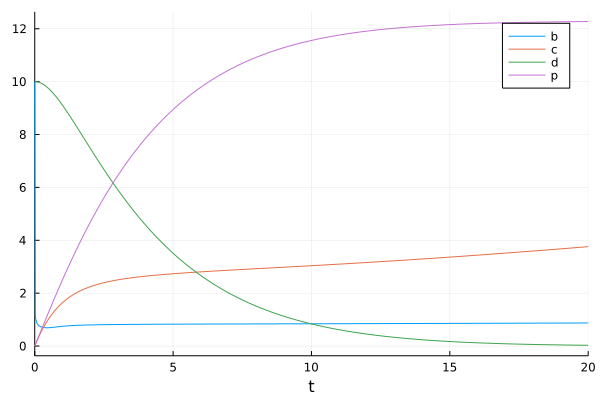

In [8]:
plot(sol3, labels=species)

In [190]:
function rates_model_bv!(dydt, initial, params, t) 
    k1, k2, k3, k4, katp, ctot, a0, b0 = params 

    b, c, d, p = initial 

    dbdt, dcdt, dddt, dpdt = zeros(length(dydt))
    
    a = ((6*a0-b0+b)/6)
    vmax = k2*ctot
    kb = c/(a*(b^6))
    e = (k3*d*ctot/(k4+katp+k3*d)) 
    v = vmax*kb*(b^6)/(1+kb*(b^6)) # hill

    # dydt[1] = -6*k1*(b^6)*a + 6*k2*c 
    dydt[1] = -6v
    dydt[2] = v - k3*c*d + k4*e + katp*e 
    dydt[3] = -k3*c*d + k4*e
    dydt[4] =  katp*e
    
end

rates_model_bv! (generic function with 1 method)

In [191]:
prob4 = ODEProblem(rates_model_bv!, init, tspan, params);
sol4 = solve(prob4, alg=Rodas4());

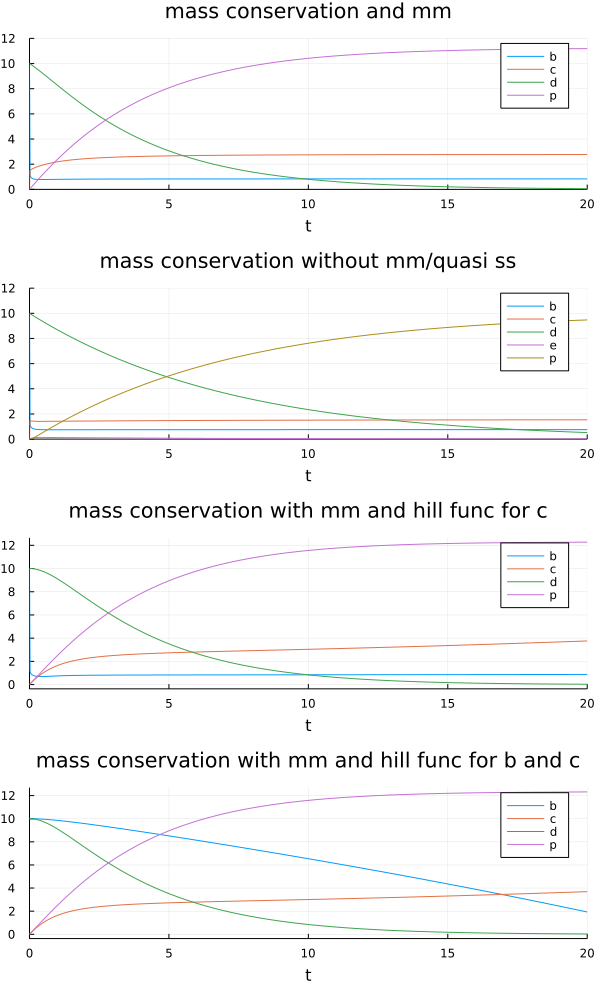

In [195]:
p1 = plot(sol, labels=species, title="mass conservation and mm", ylim=(0,12))
p2 = plot(sol2, labels=species3, title="mass conservation without mm/quasi ss", ylim=(0,12))
p3 = plot(sol3, labels=species, title="mass conservation with mm and hill func for c")
p4 = plot(sol4, labels=species, title="mass conservation with mm and hill func for b and c")
plot(p1, p2, p3, p4, layout=(4,1), size=(600,1000))

In [132]:
solDF3 = DataFrame([[j[i] for j in sol3.u] for i=1:length(sol3.u[1])], species2);
b3 = solDF3[!, :b];
c3 = solDF3[!, :c];
d3 = solDF3[!, :d];
p3 = solDF3[!, :p];

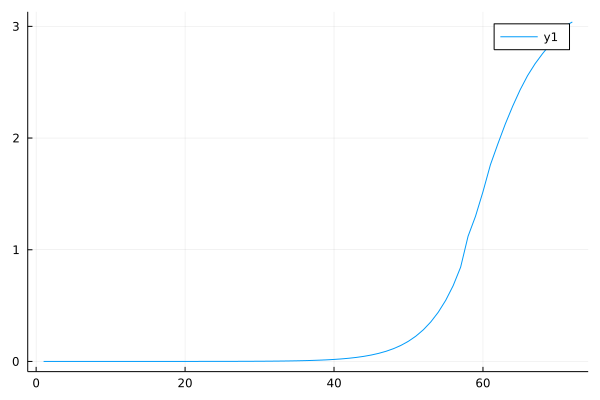

In [200]:
plot(c3)